In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler

path = '/content/drive/MyDrive/Colab Notebooks/Retail/data/'

In [4]:
data = pd.read_csv(path + 'df1019_1.csv')
data.head()

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday,대분류,소분류
0,2021-07-24,0,황도복숭아,1,5980,5980,7,5,과일,복숭아
1,2021-07-24,0,황도복숭아,1,5980,5980,7,5,과일,복숭아
2,2021-07-24,0,황도복숭아,1,5980,5980,7,5,과일,복숭아
3,2021-07-24,0,황도복숭아,1,5980,5980,7,5,과일,복숭아
4,2021-07-24,0,황도복숭아,1,5980,5980,7,5,과일,복숭아


In [33]:
df = data.copy()

In [35]:
mapping = {'과일':1, '채소':2, '야채':3, '두부/콩나물/계란':4, '냉장식품':5, '수산':6, '건조식품':7, '생수/음료/커피':8,
       '배추':9, '과자/대용식':10, '유제품':11, '소스/양념/조미료':12, '김치/반찬':13, '통조림/즉석밥':14, '냉동':15, '주류':16,
       '커피/원두/차':17, '라면/면류':18, '문구':19, '양곡':20, '정육':21, '돼지고기':22, '주채소':23, '유아':24, '냉동식품':25,
       '과자':26, '세제':27, '주방용품':28, '화장실/물티슈/위생':29, '스포츠레저':30, '화장지/물티슈/위생':31, '세탁용품':32,
       '리빙용품':33, '아이스크림':34, '사탕/껌/젤리':35, '어묵맛살':36, '냉장찌개':37, '의류잡화':38, '생수/음료/커파':39,
       '바나나':40, '소형가전':41, '김치/양념':42}

In [36]:
labeling = df.대분류.map(mapping)
df['label'] = labeling

In [37]:
mapping = {'복숭아':1, '고추':2, '배':3, '사과':4, '감':5, '감귤':6, '만감류':7, '딸기':8, '산딸기':9, '수박':10, '포도':11,
       '토마토':12, '참외':13, '자두':14, '살구':15, '무화과':16, '바나나':17, '파인애플':18, '레몬':19, '키위':20, '체리':21,
       '오렌지':22, '멜론':23, '망고':24, '블루베리':25, '아보카도':26, '귤':27, '방울토마토':28, '채소':29, '황도':30, '석류':31,
       '블루벨리':32, '용과':33}

In [38]:
# 과일
df_fruit = df[df['label']==1]

In [40]:
labeling = df_fruit.소분류.map(mapping)
df_fruit['label_2'] = labeling

In [ ]:
df.month.value_counts()

9     1444579
8     1239661
1     1225630
3     1171816
7     1150806
6     1133545
4     1123733
5     1122705
2     1015904
12     947607
10     765025
11     743830
Name: month, dtype: int64

In [ ]:
df_2 = df[df['month']==2]
df_3 = df[df['month']==3]
df_4 = df[df['month']==4]
df_5 = df[df['month']==5]
df_6 = df[df['month']==6]
df_7 = df[df['month']==7]
df_8 = df[df['month']==8]
df_9 = df[df['month']==9]
df_10 = df[df['month']==10]
df_11 = df[df['month']==11]
df_12 = df[df['month']==12]

# 1월

In [42]:
df_1 = df_fruit[df_fruit['month']==1]

In [43]:
df_1

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday,대분류,소분류,label,label_2
695981,2022-01-18,201341,홍고추,1,1000,1000,1,1,과일,고추,1,2
695982,2022-01-19,201341,홍고추,1,1000,1000,1,2,과일,고추,1,2
695983,2022-01-24,201341,홍고추,1,1000,1000,1,0,과일,고추,1,2
695984,2022-01-24,201341,홍고추,1,1900,1900,1,0,과일,고추,1,2
695985,2022-01-24,201341,홍고추,1,1900,1900,1,0,과일,고추,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
12961848,2022-01-09,8809509099988,부사사과10입,1,6980,6980,1,6,과일,사과,1,4
12961849,2022-01-13,8809509099988,부사사과10입,1,6980,6980,1,3,과일,사과,1,4
12961850,2022-01-14,8809509099988,부사사과10입,1,6980,6980,1,4,과일,사과,1,4
12961851,2022-01-24,8809509099988,부사사과10입,1,6980,6980,1,0,과일,사과,1,4


In [44]:
df_1_mon = df_1[df_1['weekday']==0]
df_1_mon

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday,대분류,소분류,label,label_2
695983,2022-01-24,201341,홍고추,1,1000,1000,1,0,과일,고추,1,2
695984,2022-01-24,201341,홍고추,1,1900,1900,1,0,과일,고추,1,2
695985,2022-01-24,201341,홍고추,1,1900,1900,1,0,과일,고추,1,2
695986,2022-01-24,201341,홍고추,1,1900,1900,1,0,과일,고추,1,2
696009,2022-01-31,201341,홍고추,1,1900,1900,1,0,과일,고추,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
12961031,2021-01-25,8809509099988,부사사과10입,1,9800,9800,1,0,과일,사과,1,4
12961032,2021-01-25,8809509099988,부사사과10입,1,9800,9800,1,0,과일,사과,1,4
12961846,2022-01-03,8809509099988,부사사과10입,1,6980,6980,1,0,과일,사과,1,4
12961851,2022-01-24,8809509099988,부사사과10입,1,6980,6980,1,0,과일,사과,1,4


In [20]:
# df_1['SAL_DT']= df_1['SAL_DT'].astype('string')

In [ ]:
# df_1 = df_1.drop(columns=['SAL_DT','PLU_CD'])

In [ ]:
# df_1= df_1.astype({'GDS_NM':'string', '대분류':'string', '소분류':'string', 'SALE_QTY':float, 'SALE_PRC':float,'SALE_AMT':float, 'month':float, 'weekday':float})

In [45]:
from sklearn.preprocessing import StandardScaler

dfdf = df_1_mon[['SALE_AMT', 'label_2']]

scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(dfdf), columns=dfdf.columns)


In [46]:
df_scale

,SALE_AMT,label_2
0,-0.611006,-1.226110
1,-0.539749,-1.226110
2,-0.539749,-1.226110
3,-0.539749,-1.226110
4,-0.539749,-1.226110
...,...,...
13615,0.085726,-0.960969
13616,0.085726,-0.960969
13617,-0.137545,-0.960969
13618,-0.137545,-0.960969


# sd


In [64]:
dfdf= df_fruit[df_fruit['weekday']==0]
dfdf = dfdf.drop(['PLU_CD','SALE_QTY','SALE_PRC','weekday','대분류','소분류','label','SAL_DT','GDS_NM'], axis=1)

In [71]:
dfdf.label_2.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

In [66]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(data=scaler.fit_transform(dfdf), columns=dfdf.columns)

In [68]:
scaled_df.head()

,SALE_AMT,month,label_2
0,0.000069,0.545455,0.0
1,0.000069,0.545455,0.0
2,0.000069,0.545455,0.0
3,0.000069,0.545455,0.0
4,0.000069,0.545455,0.0


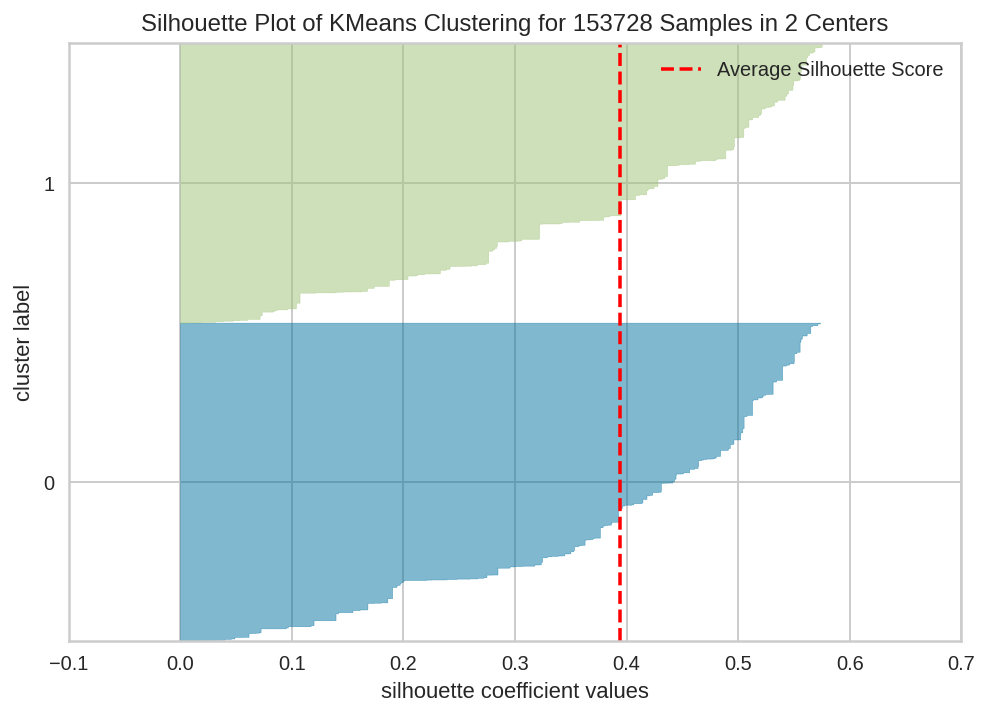

In [69]:
kmeans_2 = KMeans(n_clusters=2, random_state=111,init='random')
#visualizer 생성
visualizer_2 = SilhouetteVisualizer(kmeans_2, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_2.fit(scaled_df)      
visualizer_2.show()

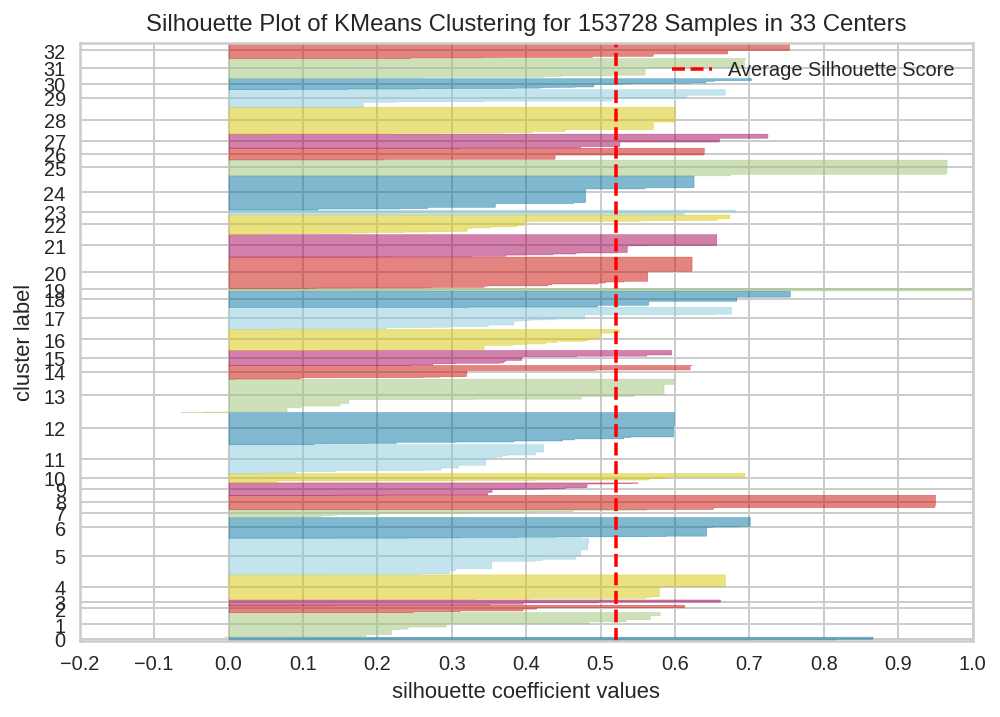

In [72]:
kmeans_33 = KMeans(n_clusters=33, random_state=111,init='random')
#visualizer 생성
visualizer_33 = SilhouetteVisualizer(kmeans_33, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
visualizer_33.fit(scaled_df)      
visualizer_33.show()